In [6]:
import numpy as np
from scipy import optimize
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)
sns.set_palette("Set1")

In [24]:
def rastrigin(X, **kwargs):
    A = kwargs.get('A', 10)
    return A*len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

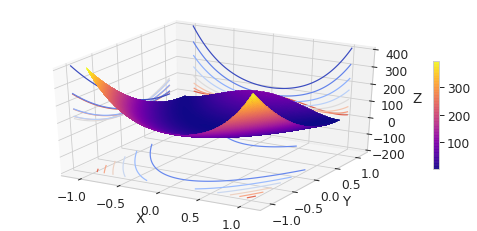

In [197]:
#Plot rosenbrock 


X = np.linspace(-1, 1, 200)
Y = np.linspace(-1, 1, 200)

X, Y = np.meshgrid(X, Y)

Z = optimize.rosen([X, Y])

fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, \
                alpha=0.6, antialiased=False) 
plt.colorbar(p, fraction=0.046, shrink=0.5, pad=0.04)

cset = ax.contour(X, Y, Z, zdir='x', offset=-1.2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=1.2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='z', offset=-200, cmap=cm.coolwarm)


ax.set_xlabel('X')
ax.set_xlim(-1.2, 1.2)
ax.set_ylabel('Y')
ax.set_ylim(-1.2, 1.2)
ax.set_zlabel('Z')
ax.set_zlim(-200, 400)
plt.savefig('figs/rosen.pdf', bbox_inches = 'tight', pad_inches = 0)

In [177]:
#Rastrigin
init_state = np.array([-4, 4])
opt = optimize.minimize(fun=rastrigin, x0=init_state, method="Nelder-Mead", \
                         options={ 'maxiter': 1000, 'maxfev': 1000,\
                       'disp': False, 'return_all': True,\
                       'xatol': 0.00001, 'fatol': 0.000001, 'adaptive': True})

#Rosen
init_state1 = np.array([-2, 2])
opt1 = optimize.minimize(fun=optimize.rosen, x0=init_state1, method="Nelder-Mead", \
                         options={ 'maxiter': 1000, 'maxfev': 1000,\
                       'disp': False, 'return_all': True,\
                       'xatol': 0.001, 'fatol': 0.0001, 'adaptive': True})

In [204]:
opt['x'], opt['fun'], opt['nit'] # Result for rastrigin

(array([-3.97978147,  3.97978521]), 31.8384875864047, 35)

In [205]:
opt1['x'], opt1['fun'], opt1['nit'] # Result for rosenbrock

(array([1.00012086, 1.00025554]), 3.3631730268022354e-08, 92)

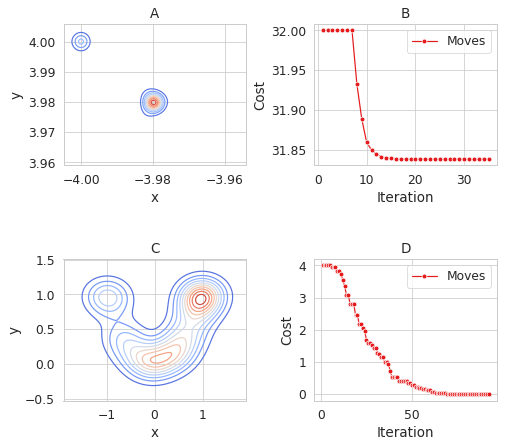

In [202]:
#subplot layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(7,6))
fig.tight_layout(h_pad=5, w_pad=2)

#first plot
sns.kdeplot([i[0] for i in opt['allvecs']], [i[1] for i in opt['allvecs']], cmap='coolwarm', ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('A')
#second plot
sns.lineplot(list(range(1, len(opt['allvecs']) + 1)), \
             [rastrigin(i) for i in opt['allvecs']], marker='o', label="Moves", ax=ax2)
# sns.lineplot(list(range(1, len(a.all_costs)+1)), a.all_costs, label="Random moves", ax=ax2)
ax2.set_title('B')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')

sns.kdeplot([i[0] for i in opt1['allvecs']], [i[1] for i in opt1['allvecs']], cmap='coolwarm', ax=ax3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('C')
#second plot
sns.lineplot(list(range(1, len(opt1['allvecs']) + 1)), \
             [optimize.rosen(i) for i in opt1['allvecs']], marker='o', label="Moves", ax=ax4)
# sns.lineplot(list(range(1, len(a.all_costs)+1)), a.all_costs, label="Random moves", ax=ax2)
ax4.set_title('D')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Cost')


plt.savefig('figs/Nelder-Mead.pdf', bbox_inches = 'tight', pad_inches = 0)